# Random Forest

Random forest is a bagging technique that trains many decesion trees with minor modification on the split criteria

In case of decesion trees we train a single tree but in random forest we train many different kinds of trees on diffrent training sets obtained through bootstrap aggregation

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

# Bagging

We define a function for bagging :- Creating 1 bootstrap samples $D_{1},D_{2},D_{3}..D_{q}$ from the original dataset $D$:

In [39]:
def bag(X,y):
    n_samples = X.shape[0]
    
    indices = np.random.choice(n_samples,size=n_samples,replace=True)
    
    return X[indices],y[indices]

# Majority Voting

In [95]:
def majority_voting(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

We create $\texttt{RandomForest}$ class with the following parameters:
- number of tree = 10
- minimum number of samples = 2
- maximum depth = 100

The $\texttt{max_features}$ is a parameter which can be set by the user

In [98]:
class RandomForestClassifier():
    def __init__(self,n_trees=10,min_sample_split=2,max_depth=100,max_features=None):
        self.n_trees = n_trees
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        self.max_features = max_features
        
    def fit(self,X,y):
        self.trees = []
        
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features= self.max_features 
            )
            X_sample,y_sample = bag(X,y)
            
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
            
        
    def predict(self,X):
        tree_predict = np.array([tree.predict(X) for tree in self.trees])
        tree_predict = np.swapaxes(tree_predict,0,1)
        y_pred = [majority_voting(tree_pred) for tree_pred in tree_predict]
        
        return np.array(y_pred)

# Implementation of dataset

In [99]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true,y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    
    return accuracy

data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

clf = RandomForestClassifier(n_trees=10,max_depth=10,max_features='sqrt')

trees = clf.fit(X_train,y_train)

In [100]:
y_pred = clf.predict(X_test)

In [101]:
print(f'Accuracy: {accuracy(y_test,y_pred)}')

Accuracy: 0.9736842105263158


# Gradient Boosting

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
def GradBoost(model,X_train,y_train,X_test,y_test,boosting_rounds,learning_rate:float  =0.1):
    y_hat_train = np.repeat(np.mean(y_train),len(y_train))
    
    y_hat_test = np.repeat(np.mean(y_train),len(X_test))
    
    resudials = y_train - y_hat_train
    
    for i in range(boosting_rounds):
        
        model = model.fit(X_train,resudials)
        y_hat_train = y_hat_train + model.predict(X_train)*learning_rate
        
        y_hat_test = y_hat_test + model.predict(X_test)*learning_rate
        
        
        resudials = y_train - y_hat_train
    return y_hat_train,y_hat_test

In [126]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=1000,n_features=20,n_informative=15,n_targets=1,bias=0,noise=20,shuffle=True,random_state=13)

X_train = X[:800,:]
y_train = y[:800]

X_test = X[800:,:]
y_test = y[800:]

In [127]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error',max_depth=3)

In [128]:
mse_train =[]
n_rounds = np.arange(5,101,5)
for n_round in n_rounds:
    y_hat_train,y_hat_test = GradBoost(model,X_train,y_train,X_test,y_test,boosting_rounds=n_round)
    print(f'n_round:{n_round}')
    mse_train.append(np.mean(y_train - y_hat_train)**2)

n_round:5
n_round:10
n_round:15
n_round:20
n_round:25
n_round:30
n_round:35
n_round:40
n_round:45
n_round:50
n_round:55
n_round:60
n_round:65
n_round:70
n_round:75
n_round:80
n_round:85
n_round:90
n_round:95
n_round:100


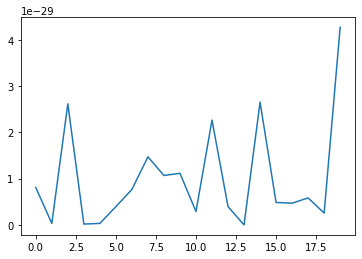

In [129]:
plt.plot(mse_train)